<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/ML-Classification-Capstone-project/blob/main/Credit_Card_Default_Prediction_Capstone_Project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

##**Import the dependancy**

In [ ]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install 1.2.0 version of xlrd because our data is in xls format
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Abhishek Mishra ML classification capstone project/Copy of default of credit card clients.xls') 

In [ ]:
# Check first five rows of the data
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# Checking for null data
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

* From the above data we can understand that there are no null values present in the data

In [ ]:
# Checking last five rows of the data
df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


* **We can see that the data type of all columns are object data types.** 
* **So we need to convert it into integer type**
* **Also we can check all the data could be int.**

In [ ]:
# Creating variable with the help of index 0
column_names = list(df.iloc[0].values)

# droping first row 
df.drop(index = df.index[0],axis = 0, inplace = True)

# Reset the columns
df = df.set_axis(column_names,axis = 1)

# Changing the data-types of each features
df = df.astype('int')

new_df=df

In [ ]:
# Check for data info for better understanding of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## **Exploratory Data Analysis (EDA)**

In [ ]:
#let's create a variable for the dataframe
data=df

#Describe the data for better understanding
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
# Check the data distribution 
data['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [ ]:
# Let's check count for all pay 0 to 6
# Sort the repayment status codes in PAY columns by melting them into 1 column
value_count_pay = data[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]

#Check melt for data
value_count_pay_melt = pd.melt(value_count_pay) 

#Check value count
value_count_pay_melt['value'].value_counts() 

 0    95919
-1    34640
-2    24415
 2    18964
 1     3722
 3     1430
 4      453
 7      218
 5      137
 6       74
 8       28
Name: value, dtype: int64

* Notice code **0** and -**2** are in the **PAY** columns but are **not** included in the data **description**.

* We found there are **95919** values as listed as **0**. Using some **google search** we found that **0**  meaning the **payment wasn't due**, which makes sense that most customers were using the revolving credit.

* Also we found **24415** values as **-2** which means **No consumption**.

### **Check label data column**

In [ ]:
#Check data for label column
data['default payment next month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

* So, we have **77.88%** data as **credit not default** and **22%** data as **credit default**.
* So, our data is highly **Imbalanced**.

## **Data Cleaning**

### **Checking the missing values**

In [ ]:
# check for the null values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

* So our data have **no null values.**

### **Rename the Column Name**

In [ ]:
# Rename pay_0 to pay1
data.rename(columns={'PAY_0':'PAY_1'},inplace = True)

# print the columns to check our changes happens sucessfully
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


* So name has changed as **pay_0** to **pay_1**

### **Check duplicate records**
There are no duplicate IDs or rows.

In [ ]:
# Check if there is any duplicate IDs
condition = bool(data.duplicated(subset = 'ID').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


### **Identify outliers**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# let's check all columns for checking outliers
columns = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
# let's create a function to check the outliers
def check_outliers(columns,data):

  # use plotly for better plot
  for i in columns:
    fig = px.box(data,y=i)
    fig.update_layout(height=500, width=600)
    fig.show()

In [ ]:
# Plot the graph
check_outliers(columns,data)

* So we have some outliers in plot

In [ ]:
# Check for LIMIT_BAL column the row
outlier =data.loc[data['LIMIT_BAL'] > 900000]
outlier

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2198,2198,1000000,2,1,1,47,0,0,0,-1,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


* This was just a customer who has an excellent payment history. So we have only one row so we think this a valid row.

### **we can create a column to check if the customer has default or not.**

In [ ]:
data_condation = (data.PAY_1 > 1) | (data.PAY_2 > 1) | (data.PAY_3 > 1) | (data.PAY_4 > 1) | (data.PAY_5 > 1) | (data.PAY_6 > 1)
data.loc[data_condation, "HAS_DEF"] = 1
data.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0
data.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,HAS_DEF
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1.0


**So we have an other column has_def in this column we can see weather the customer have any deff or not.**

### **Make id columns as axis**

In [ ]:
## set id column as index
data.set_index("ID",inplace = True)

#print first i rows
data.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,HAS_DEF
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1.0


### **Let's do some analysis on columns**

In [ ]:
# Create a function for ploting the graph for has deff or not
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['HAS_DEF'],columns = df[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

#### **1- Check "SEX" column**

In [ ]:
# Check sex column
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
# Change sex code to 'Female' and 'Male' and use category as datatype
data["SEX"]=data["SEX"].map({1:'Male',2:'Female'}).astype('category')
data['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

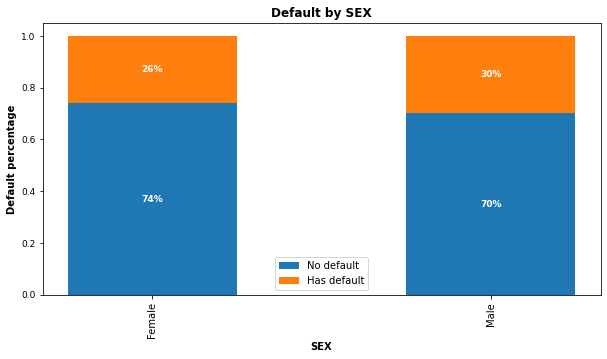

In [ ]:
# check data for sex column
create_stacked_bar("SEX")

1. 30% male have default payment while 26% female have default payment, the difference between them is not significant.

2. Also we can observe that female have more count than male

#### **2- Check "Education" Column**

In [ ]:
#Check EDUCATION column
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

1. **'EDUCATION'** column: notice **5** and **6** are both recorded as **'unknown'** and there is 0 which isn't explained in the dataset description. 

2. Since the amounts are so small, let's combine **0,4,5,6** to **0** which means**"other**'.

In [ ]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others
data['EDUCATION'] = data['EDUCATION'].replace({4:0, 5:0, 6:0})

#Check the count of the data
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

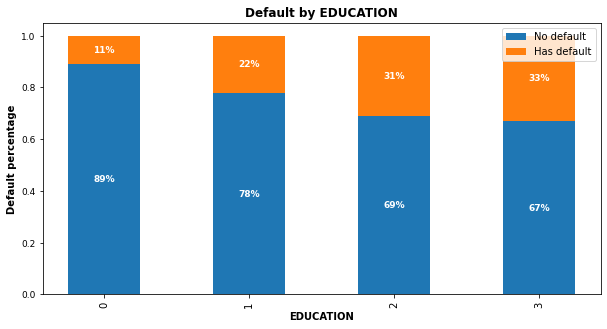

In [ ]:
# check data for education
create_stacked_bar("EDUCATION")

1. The data indicates customers with lower education levels default more.

2. Customers with high school and university educational level had higher default percentages than customers with grad school education did.

#### **3- Check MARRIGE column**

In [ ]:
#Check  the count of the data
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

1. 'MARRIAGE' column: what does 0 mean in 'MARRIAGE'? Since there are only     54 observations of 0, 

2. we will combine 0 and 3 in one value as 'others'.



In [ ]:
data['MARRIAGE'] = data['MARRIAGE'].replace({0:3})

#Check the count of the data
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

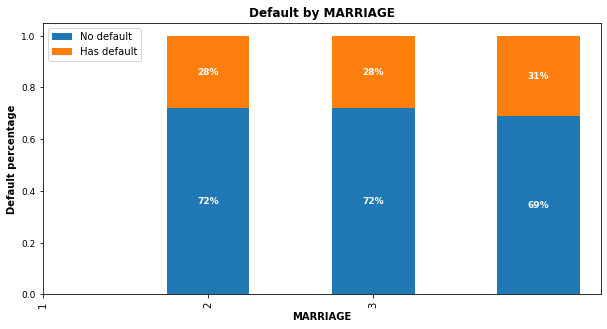

In [ ]:
# Check data for marrige column
create_stacked_bar('MARRIAGE')

In [ ]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,HAS_DEF
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1.0
2,120000,Female,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1.0
3,90000,Female,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
4,50000,Female,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
5,50000,Male,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0.0


#### **4- Let's check the change status of the pamynent in months**

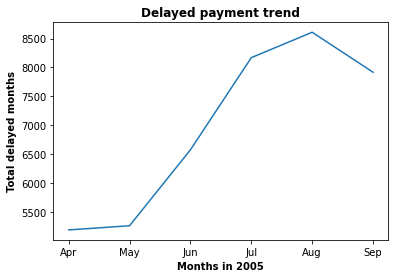

In [ ]:
# Subset a dataframe with the records that have default
has_deff = data[data['HAS_DEF'] == 1]
default_trend = has_deff[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)
default_trend

# Draw a line chart for better understanding
fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

* There was a huge jump from May 2005  to July 2005 

* When delayed payment increased significantly, then it peaked at August 2005.

* Things started to getting better in September 2005 .

#### **5- Check the relation between credit limit and the default payment next month**

In [ ]:
# 1: default next month; 0: no default next month
def0 = data.loc[data['default payment next month'] == 0,'LIMIT_BAL']
def1 = data.loc[data['default payment next month'] == 1,'LIMIT_BAL']

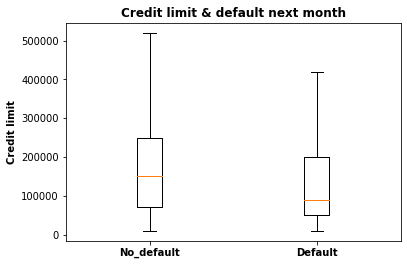

In [ ]:
# Make a boxplot to visualize credit limit and default payment next month
fig, ax = plt.subplots()
ax.boxplot([def0, def1],  showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

# Show the plot
plt.show()

* Unsurprisingly, customers who had higher credit limits had lower delayed payment rates.

#### **6- Check there are some negative bills**

In [ ]:
# Get statistic summary of bill statement columns
bills = data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
bills.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [ ]:
# How many bills have negative amount using melt?
bill_melt = pd.melt(bills, var_name = 'bill_cycle',value_name = 'amount')
neg_bill = bill_melt[bill_melt['amount']<0]
neg_bill.groupby('bill_cycle').count()


,amount
bill_cycle,
BILL_AMT1,590
BILL_AMT2,669
BILL_AMT3,655
BILL_AMT4,675
BILL_AMT5,655
BILL_AMT6,688


*  The minimals of those 6 bill columns are negative numbers. 
* In general, there are 590-688 bills with negative amounts each month, which is less than 2% of total 30,000 records monthly.

#### **7- Check Why are some bill statement amounts greater than credit limit**

In [ ]:
# Is there any bill amount that is greater than credit limit?

condition1 = data['BILL_AMT1'] > data['LIMIT_BAL'] 
condition2 = data['BILL_AMT2'] > data['LIMIT_BAL'] 
condition3 = data['BILL_AMT3'] > data['LIMIT_BAL'] 
condition4 = data['BILL_AMT4'] > data['LIMIT_BAL'] 
condition5 = data['BILL_AMT5'] > data['LIMIT_BAL'] 
condition6 = data['BILL_AMT6'] > data['LIMIT_BAL'] 

# Add all condations
large_bill = data[condition1 | condition2 |condition3 | condition4 | condition5 | condition6]
large_bill.shape

(3931, 25)

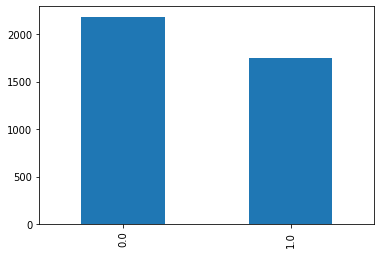

In [ ]:
# Check large_bill has diff or not
large_bill["HAS_DEF"].value_counts().plot(kind='bar')


* The common sense is that the bill statement amount shouldn't exceed credit limit.

*  however, there are 3931 customers whose bill amounts are greater than credit limit. 

* Could the difference be late payment interest assuming these customers had delayed payment?

#### **8- Check customers who had no consumption in 6 months then default in the next month**

In [ ]:
# # Is there any customer who never had any transaction, meaning bill amount in 6 months remained as 0
bill_amt = data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
no_transtion = bill_amt[bill_amt.sum(axis=1) ==0]
no_transtion

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
ID,,,,,,
19,0,0,0,0,0,0
20,0,0,0,0,0,0
46,0,0,0,0,0,0
80,0,0,0,0,0,0
122,0,0,0,0,0,0
...,...,...,...,...,...,...
29909,0,0,0,0,0,0
29910,0,0,0,0,0,0
29974,0,0,0,0,0,0


0    553
1    317
Name: default payment next month, dtype: int64


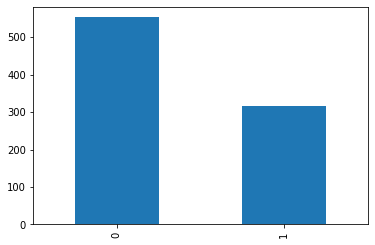

In [ ]:
# The assumption is since they did not have any consumption, they shouldn't default, so there shouldn't be any '1'

no_transaction_de = df.loc[no_transtion.index,['default payment next month']]
print(no_transaction_de['default payment next month'].value_counts())

#show the plot
no_transaction_de['default payment next month'].value_counts().plot(kind='bar')

* There are 870 customers whose bill amount was 0 in 6 months

* 317 customers had default payment next month which is against common sense.

*  We will investigate this in the data analysis process.


## **EDA Conclusion**
* Notice code **0** and -**2** are in the **PAY** columns but are **not** included in the data **description**.

* We found there are **95919** values are listed as **0**. Using some **google search** we found that **0**  meaning the **payment wasn't due**, which makes sense that most customers were using the revolving credit.

* Also we found **24415** values as **-2** which means **No consumption**.

* There are no **duplicate** IDs or rows.

* **30%** male have **default** payment while **26%** female have **defaul** payment, the difference is not significant.

* Also we can see **Female** have more **count** than **male**

* **'EDUCATION'** column: notice **5** and **6** are both recorded as **'unknown'** and there is 0 which isn't explained in the dataset description. 

* Since the amounts are so small, let's combine **0,4,5,6** to **0** which means**"other**'.

* **'MARRIAGE'** column: what does **0** mean in **'MARRIAGE'**? Since there are only  54 observations of 0, 

* we will combine **0** and **3** in one value as **'others'**.

* There was a huge jump from **May 2005**  to **July 2005** 

* when delayed payment increased significantly, then it peaked at **August 2005**.

* Things started to get better in **September, 2005** .

* Unsurprisingly, customers who had **higher credit** limits had **lower delayed** payment rates.

*  The minimals of those 6 bill columns are negative numbers. 

* In general, there are **590-688** bills with negative amounts each month, which is less than **2% **of total **30,000** records monthly.

* The common sense is that the bill statement amount shouldn't exceed credit limit.

*  However, there are **3931 customers** whose bill amounts are greater than credit limit. 

* Could the difference be late payment interest assuming these customers had **delayed payment**?


* There are **870 customers** whose bill amount was 0 in 6 months

* **317** **customers** had default payment next month which is against common sense.

### **Pairplots**

#### **Pairplots for months**

In [ ]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'HAS_DEF'],
      dtype='object')

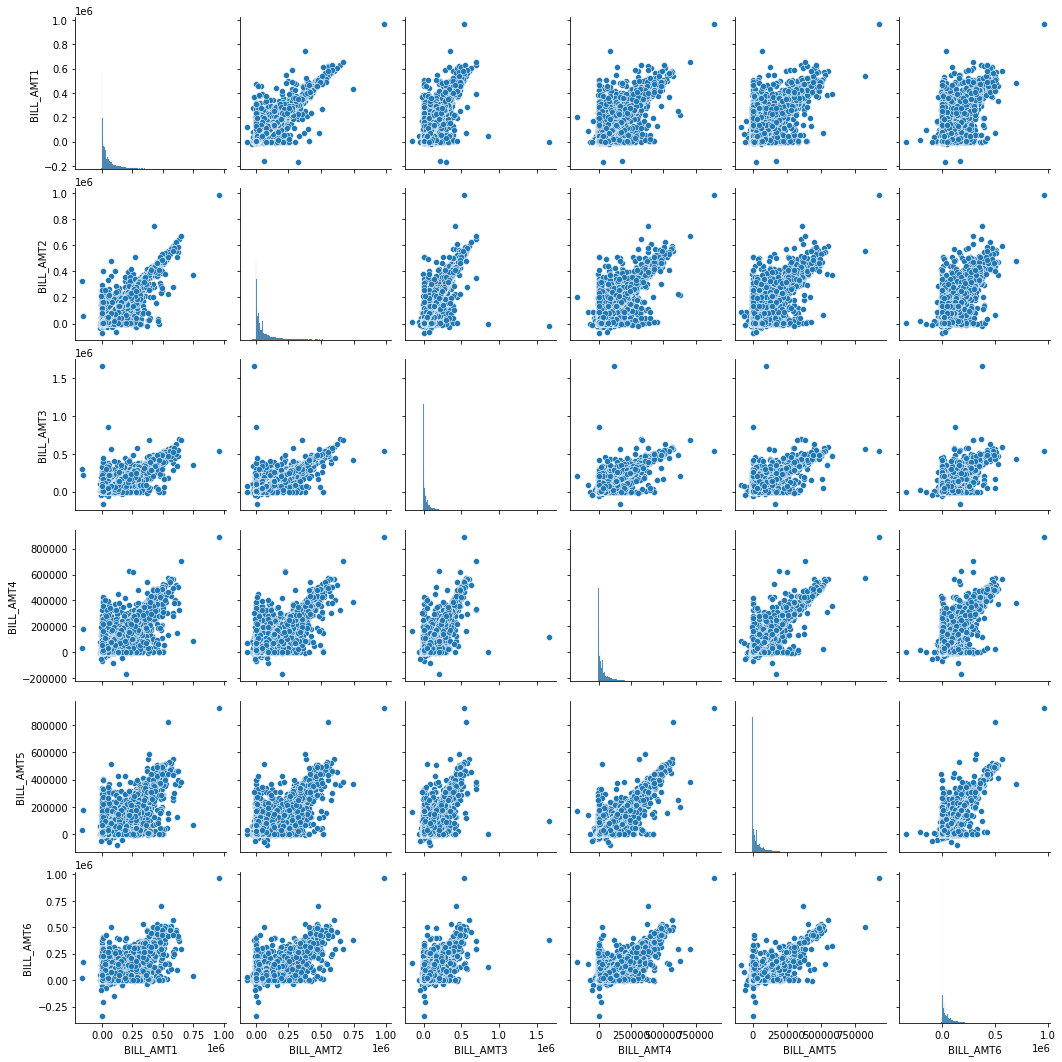

In [ ]:
# pairplot 
sns.pairplot(data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']])

#### **Pairplot for payment**

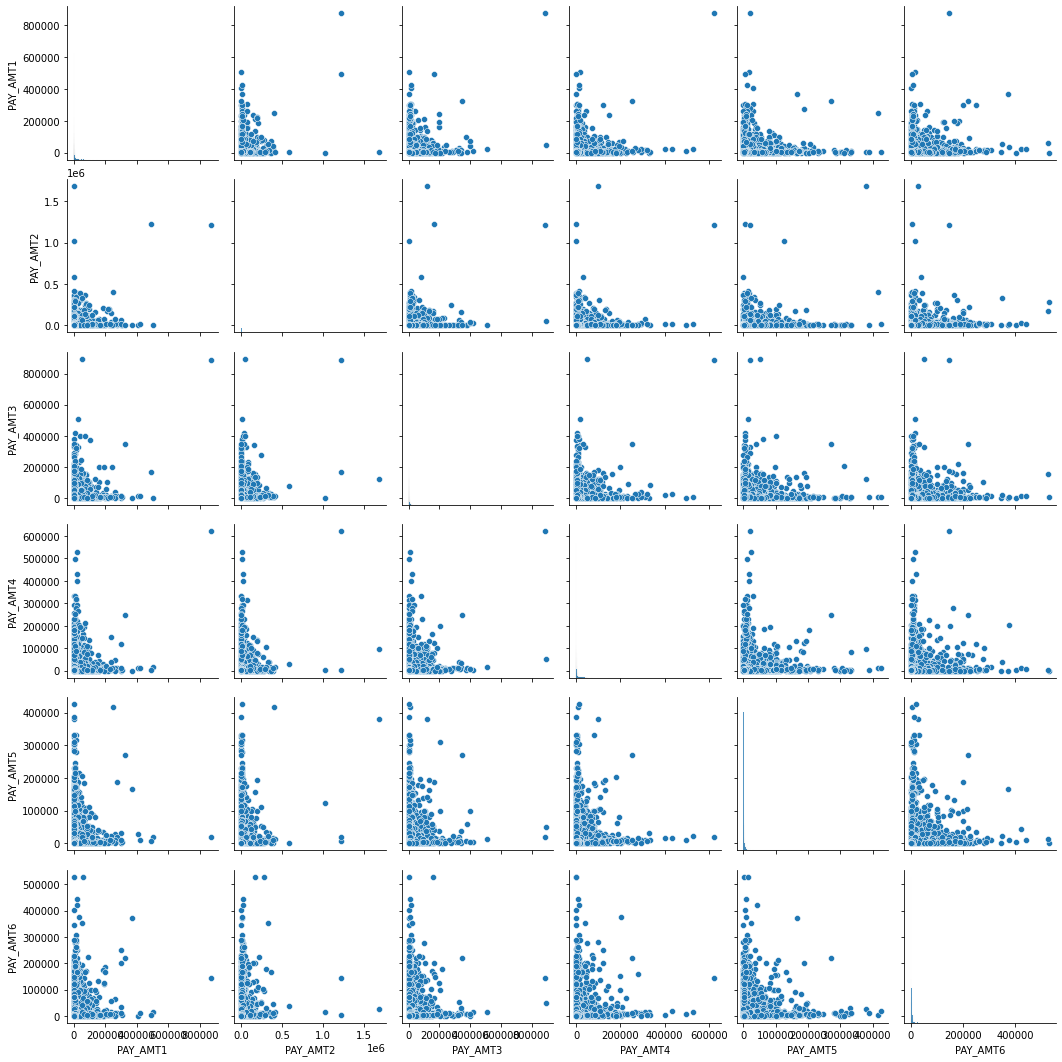

In [ ]:
# pairplpot of PREVIOUS PAYMENT of different months 
sns.pairplot(data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])

### **Correlation Matrix**

In [ ]:
# Create a dataframe
data = data.drop('HAS_DEF', axis = 1)


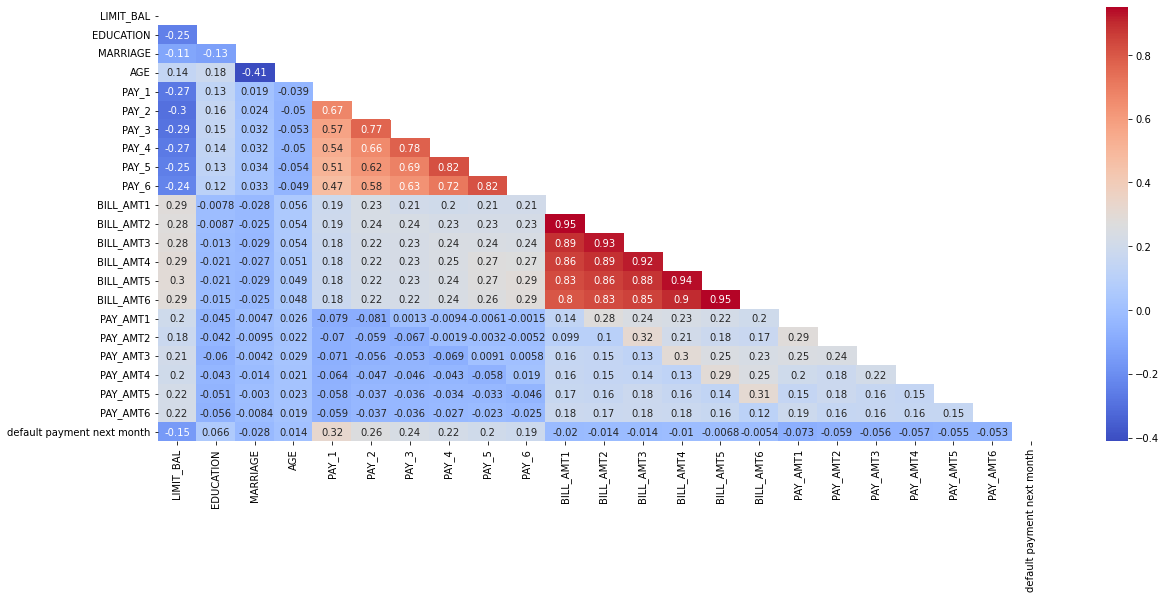

In [ ]:
# Heatmap plot for correlation between different variable
plt.figure(figsize=(20,8))
correlation = data.corr()
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap((correlation),mask=mask,annot=True,cmap='coolwarm')

## **Prepare for Modeling**

### **1. Feature Engineering**

In [ ]:
# let's create bins for age
bins= [21,30,40,50,60,70,80]
labels = list(range(6))
data['AGE'] = pd.cut(data['AGE'],bins=bins, labels=labels,right=False)

# Convert categorical column into integer by extracting the code of the categories
data.AGE = data.AGE.cat.codes


### **2- One Hot Encoding**

In [ ]:
# Change sex code to 'Female' and 'Male' and use category as datatype
data["SEX"]=data["SEX"].map({'Male':1,'Female':2})
data['SEX'].value_counts()
data['SEX'] = data['SEX'].astype(int)

### **2. Feature Selection**

In [ ]:
# Define predictor variables and target variable
X = data.drop(columns=['default payment next month'])
y = data['default payment next month']

# Save all feature names as list
feature_cols = X.columns.tolist() 

# Extract numerical columns and save as a list for rescaling
X_num = X.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'])
num_cols = X_num.columns.tolist()


### **3. Check Class Imbalance**

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64


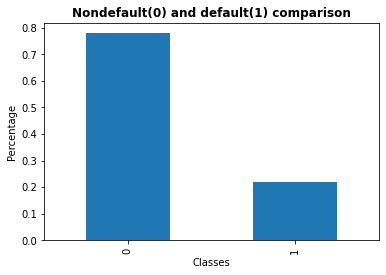

In [ ]:
# Check target classes balance
cla_bal = data['default payment next month'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

* With typical default classification problems, we expect imbalanced classes as we know most people will not default.

* This dataset is also imbalanced, with 78% non-default vs 22% default.

### **4- Split Training and Test Data**

In [ ]:
# Define function to split data with and without SMOTE 

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)


In [ ]:
# Shape of the train and test data
print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(21000, 23)
Shape of y_train:(21000,)
Shape of X_test:(9000, 23)
Shape of y_test:(9000,)


**SMOTE:-**


An approach to the construction of classifiers from imbalanced datasets is described. A
dataset is imbalanced if the classification categories are not approximately equally
represented. Often real-world data sets are predominately composed of``normal''examples
with only a small percentage of``abnormal''or``interesting''examples. It is also the case that
the cost of misclassifying an abnormal (interesting) example as a normal example is often
much higher than the cost of the reverse error

In [ ]:
# Using SMOTE 
from imblearn.over_sampling import SMOTE

print('Dataset Before:',y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

print('\nDataset After:',y_train_smt.value_counts())

Dataset Before: 0    16304
1     4696
Name: default payment next month, dtype: int64

Dataset After: 0    16304
1    16304
Name: default payment next month, dtype: int64


* Now data is perfectly balanced.

## **Classification Predictive Modeling(Model - 1)**

### **1. Logistic Regression**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [ ]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=0.001)

In [ ]:
# Best parameters 
logistic_grid_model.best_params_ 

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
# Best score
logistic_grid_model.best_score_

0.6354533083896287

In [ ]:
# Predicted results
y_train_pred = logistic_grid_model.predict(X_train_smt)
y_test_pred = logistic_grid_model.predict(X_test)

**Model Evaluation**

In [ ]:
# Importing important matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [ ]:
# Training and testing accuracy 
train_accuracy = accuracy_score(y_train_pred, y_train_smt)
test_accuracy = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)

Training accuracy: 0.5815137389597644
Testing accuracy: 0.6881111111111111


Precision score of logistic model: 0.3021451392058421
 
Recall score of logistic model: 0.34123711340206186
 
F1 score of logistic model:  0.3205035100459937
 
ROC AUC score of logistic model:  0.562332437720861
 
Confusion matrix of logistic model 
: [[5531 1529]
 [1278  662]]
 


Text(0.5, 1.0, 'Confusion Matrix of Logistic Model')

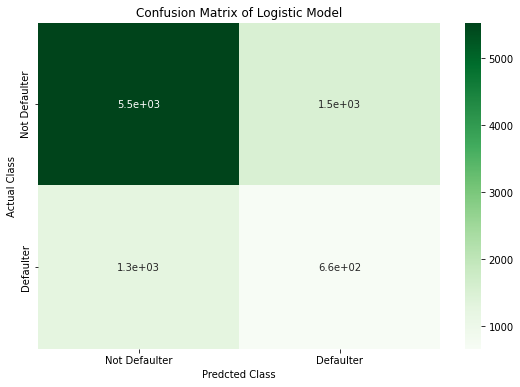

In [ ]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision, 
log_test_precision = precision_score(y_test,y_test_pred)

  # recall, 
log_test_recall = recall_score(y_test,y_test_pred,)

  # f1 score
log_f1_score = f1_score(y_test,y_test_pred)

  # roc_auc_score
log_roc_auc_score = roc_auc_score(y_test,y_test_pred)

  # confusion matrix
log_confusion_mat = confusion_matrix(y_test,y_test_pred)

  # Printing all these matrices
print('Precision score of logistic model:',log_test_precision)
print(' ')
print('Recall score of logistic model:', log_test_recall)
print(' ')
print('F1 score of logistic model: ', log_f1_score)
print(' ')
print('ROC AUC score of logistic model: ',log_roc_auc_score)
print(' ')
print('Confusion matrix of logistic model \n:',log_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(log_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Logistic Model',fontsize = 12)

### **RANDOM FOREST**

In [ ]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train_smt,y_train_smt)

RandomForestClassifier()

In [ ]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train_smt)
y_test_rf_pred = rf_classifier.predict(X_test)

In [ ]:
# Training and testing accuracy
rf_training_accuracy = accuracy_score(y_train_smt,y_train_rf_pred)
rf_testing_accuracy = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy)

Training Accuracy of Random Forest: 0.9981599607458292
Testing Accuracy of Random Forest: 0.78


Precision score of RANDOM FOREST model: 0.4889380530973451
 
Recall score of RANDOM FOREST model: 0.4556701030927835
 
F1 score of RANDOM FOREST model:  0.47171824973319104
 
ROC AUC score of RANDOM FOREST model:  0.6623959580619725
 
Confusion matrix of RANDOM FOREST 
: [[6136  924]
 [1056  884]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

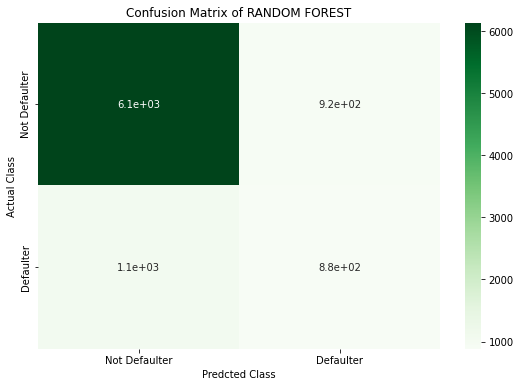

In [ ]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision, 
rf_test_precision = precision_score(y_test,y_test_rf_pred)

  # recall, 
rf_test_recall = recall_score(y_test,y_test_rf_pred,)

  # f1 score
rf_f1_score = f1_score(y_test,y_test_rf_pred)

  # roc_auc_score
rf_roc_auc_score = roc_auc_score(y_test,y_test_rf_pred)

  # confusion matrix
rf_confusion_mat = confusion_matrix(y_test,y_test_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST model:',rf_test_precision)
print(' ')
print('Recall score of RANDOM FOREST model:', rf_test_recall)
print(' ')
print('F1 score of RANDOM FOREST model: ', rf_f1_score)
print(' ')
print('ROC AUC score of RANDOM FOREST model: ',rf_roc_auc_score)
print(' ')
print('Confusion matrix of RANDOM FOREST \n:',rf_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

**Random Forest Using hyperparameter tuning**

In [ ]:
params_grid = {'n_estimators' : [100,150,200],'max_depth' : [10,20,30]}

In [ ]:
grid_renf_clf = GridSearchCV(RandomForestClassifier(), params_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_renf_clf.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
# print best score and best params
print(grid_renf_clf.best_score_)
print(grid_renf_clf.best_params_)

0.8198942557217821
{'max_depth': 30, 'n_estimators': 150}


In [ ]:
# Get the predicted classes
y_train_grid_rf_pred = grid_renf_clf.predict(X_train_smt)
y_test_grid_rf_pred = grid_renf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
ref_training_accuracy = accuracy_score(y_train_grid_rf_pred,y_train_smt)
ref_testing_accuracy = accuracy_score(y_test_grid_rf_pred,y_test)

print("The accuracy on train data is ", ref_training_accuracy)
print("The accuracy on test data is ", ref_testing_accuracy)

The accuracy on train data is  0.9980372914622179
The accuracy on test data is  0.7801111111111111


Precision score of RANDOM FOREST: 0.4891846921797005
 
Recall score of RANDOM FOREST: 0.45463917525773195
 
F1 score of RANDOM FOREST:  0.47127972214800967
 
ROC AUC score of RANDOM FOREST:  0.6620929587336818
 
Confusion matrix of RANDOM FOREST model 
: [[6139  921]
 [1058  882]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

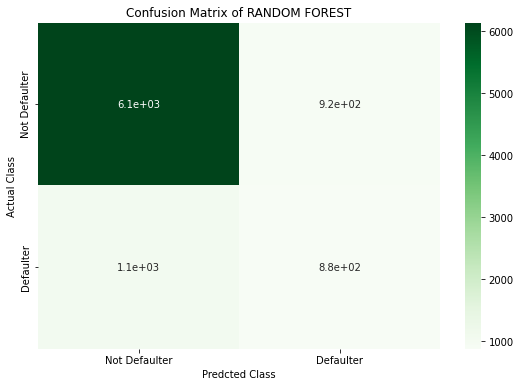

In [ ]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision, 
ref_test_precision = precision_score(y_test,y_test_grid_rf_pred)

  # recall, 
ref_test_recall = recall_score(y_test,y_test_grid_rf_pred,)

  # f1 score
ref_f1_score = f1_score(y_test,y_test_grid_rf_pred)

  # roc_auc_score
ref_roc_auc_score = roc_auc_score(y_test,y_test_grid_rf_pred)

  # confusion matrix
ref_confusion_mat = confusion_matrix(y_test,y_test_grid_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST:',ref_test_precision)
print(' ')
print('Recall score of RANDOM FOREST:', ref_test_recall)
print(' ')
print('F1 score of RANDOM FOREST: ', ref_f1_score)
print(' ')
print('ROC AUC score of RANDOM FOREST: ',ref_roc_auc_score)
print(' ')
print('Confusion matrix of RANDOM FOREST model \n:',ref_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(ref_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)



---



### **Decision Tree Classifier**

**Decision Tree Classifier with hyperparameter tuning**

In [ ]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
decision_tree_model = GridSearchCV(dtc, param_grid = {'max_depth': [2,4,6,8],
                                                      'min_samples_leaf': [2,4,6,8,10],
                                                      'min_samples_split':[2,4,6,8,10]},
                                   scoring = 'recall',cv = 3, n_jobs = -1)
decision_tree_model.fit(X_train_smt,y_train_smt)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [ ]:
decision_tree_model.best_estimator_
decision_tree_model.best_params_
decision_tree_model.best_score_

0.6846850449377927

In [ ]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(X_train_smt)
y_test_dtc_pred = decision_tree_model.predict(X_test)

# Getting the training and testing accuracy
dtc_training_accuracy = accuracy_score(y_train_smt,y_train_dtc_pred)
dtc_testing_accuracy = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy)

Training accuracy of decision tree classifier: 0.7756378802747792
Testing accuracy of decision tree classifier: 0.7518888888888889


Precision score of Decision Tree model: 0.4358300481822164
 
Recall score of Decision Tree model: 0.5128865979381443
 
F1 score of Decision Tree model:  0.47122898413450154
 
ROC AUC score of Decision Tree model:  0.6652251686574574
 
Confusion matrix of Decision Tree model 
: [[5772 1288]
 [ 945  995]]
 


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

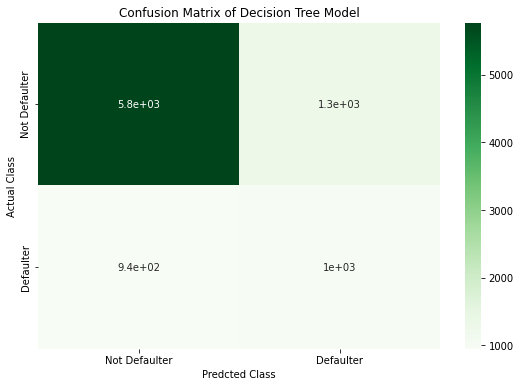

In [ ]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision, 
dt_test_precision = precision_score(y_test,y_test_dtc_pred)

  # recall, 
dt_test_recall = recall_score(y_test,y_test_dtc_pred,)

  # f1 score
dt_f1_score = f1_score(y_test,y_test_dtc_pred)

  # roc_auc_score
dt_roc_auc_score = roc_auc_score(y_test,y_test_dtc_pred)

  # confusion matrix
dt_confusion_mat = confusion_matrix(y_test,y_test_dtc_pred)

  # Printing all these matrices
print('Precision score of Decision Tree model:',dt_test_precision)
print(' ')
print('Recall score of Decision Tree model:', dt_test_recall)
print(' ')
print('F1 score of Decision Tree model: ', dt_f1_score)
print(' ')
print('ROC AUC score of Decision Tree model: ',dt_roc_auc_score)
print(' ')
print('Confusion matrix of Decision Tree model \n:',dt_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dt_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Decision Tree Model',fontsize = 12)

### **XGBoost**

In [ ]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train_smt,y_train_smt)

XGBClassifier(class_weight='balanced',
              parameters={'eta': 1, 'eval_metric': 'auc', 'max_depth': 7,
                          'silent': 1},
              random_state=42)

In [ ]:
# Train and test prediction
y_train_xgb_pred = xgb.predict(X_train_smt)
y_test_xgb_pred = xgb.predict(X_test)
  

# gettig training and testing accuracy
xgb_training_accuracy = accuracy_score(y_train_xgb_pred,y_train_smt)
xgb_testing_accuracy = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy}')

Training Accuracy of XGBClassifier: 0.7892235034347399
Testing Accuracy of XGBClassifier: 0.7578888888888888


Precision score of XGBoost model: 0.44890979050876445
 
Recall score of XGBoost model: 0.5412371134020618
 
F1 score of XGBoost model:  0.4907688712315962
 
ROC AUC score of XGBoost model:  0.6793296048596711
 
Confusion matrix of XGBoost model 
: [[5771 1289]
 [ 890 1050]]
 


Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model')

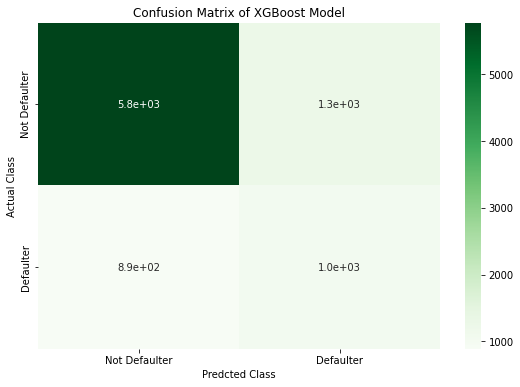

In [ ]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision, 
xg_test_precision = precision_score(y_test,y_test_xgb_pred)

  # recall, 
xg_test_recall = recall_score(y_test,y_test_xgb_pred,)

  # f1 score
xg_f1_score = f1_score(y_test,y_test_xgb_pred)

  # roc_auc_score
xg_roc_auc_score = roc_auc_score(y_test,y_test_xgb_pred)

  # confusion matrix
xg_confusion_mat = confusion_matrix(y_test,y_test_xgb_pred)

  # Printing all these matrices
print('Precision score of XGBoost model:',xg_test_precision)
print(' ')
print('Recall score of XGBoost model:', xg_test_recall)
print(' ')
print('F1 score of XGBoost model: ', xg_f1_score)
print(' ')
print('ROC AUC score of XGBoost model: ',xg_roc_auc_score)
print(' ')
print('Confusion matrix of XGBoost model \n:',xg_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xg_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBoost Model',fontsize = 12)

## **EVALUATION MATRIX**

In [ ]:
# explaining evaluation matrix
Models = ['Logistic Regression','Random Forest','Random Forest tuning','Decision Tree Classifier', 'XGBoost Classifier']
train_accuracy = [train_accuracy, rf_training_accuracy, ref_training_accuracy,dtc_training_accuracy, xgb_training_accuracy]
test_accuracy = [test_accuracy, rf_testing_accuracy, ref_testing_accuracy,dtc_testing_accuracy, xgb_testing_accuracy]
precision_score = [log_test_precision, rf_test_precision, ref_test_precision,dt_test_precision, xg_test_precision]
recall_score = [log_test_recall, rf_test_recall, ref_test_recall,dt_test_recall,xg_test_recall]
f1_score = [log_f1_score, rf_f1_score, ref_f1_score,dt_f1_score, xg_f1_score]
roc_auc_score = [log_roc_auc_score, rf_roc_auc_score, ref_roc_auc_score,dt_roc_auc_score, xg_roc_auc_score]

data = {'Classification Models':Models,'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy,
        'Precision Score':precision_score,'Recall Score':recall_score,'F1 Score':f1_score,'ROC-AUC Score':roc_auc_score}

evaluation_matrix = pd.DataFrame(data)
evaluation_matrix

,Classification Models,Training Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Logistic Regression,0.581514,0.688111,0.302145,0.341237,0.320504,0.562332
1,Random Forest,0.998160,0.780000,0.488938,0.455670,0.471718,0.662396
2,Random Forest tuning,0.998037,0.780111,0.489185,0.454639,0.471280,0.662093
3,Decision Tree Classifier,0.775638,0.751889,0.435830,0.512887,0.471229,0.665225
4,XGBoost Classifier,0.789224,0.757889,0.448910,0.541237,0.490769,0.679330


* 'MARRIGE' is the most important features and pay_1 and SEX are also important.

* pay_amt4 is the least important featers.


## **Plot ROC-AUC Curve**

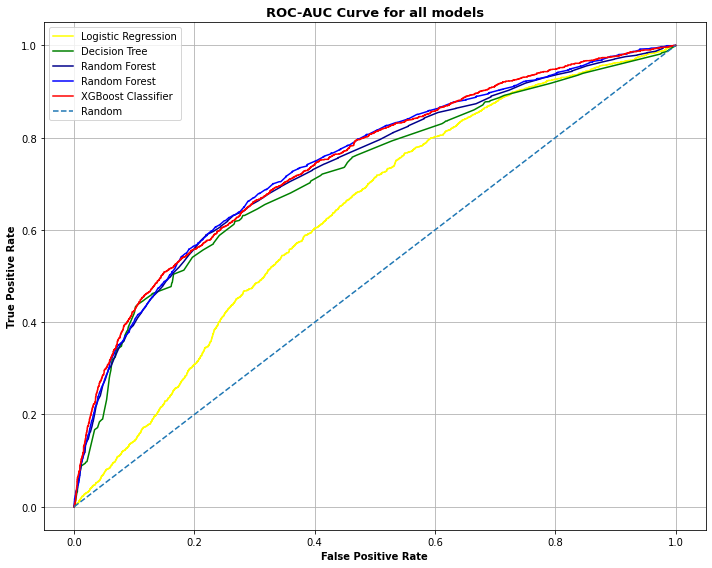

In [ ]:
from sklearn import metrics
# predicting probabilities for all model used
y_log_proba = logistic_grid_model.predict_proba(X_test)[::,1]
y_dtc_proba = decision_tree_model.predict_proba(X_test)[::,1]
y_rf_proba = rf_classifier.predict_proba(X_test)[::,1]
y_ref_proba = grid_renf_clf.predict_proba(X_test)[::,1]
y_xgb_proba = xgb.predict_proba(X_test)[::,1]

# define metrics
fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_log_proba)
fpr_dtc, tpr_dtc, _ = metrics.roc_curve(y_test,  y_dtc_proba)
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_rf_proba)
fpr_ref, tpr_ref, _ = metrics.roc_curve(y_test,  y_ref_proba)

fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_xgb_proba)

#
random_probs = [0 for _ in range(len(y_test))]
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)

# plotting ROC-AUC curve
plt.figure(figsize = (10,8))
plt.grid(True)

# plot the the ROC-AUC curve for the logistic Model
plt.plot(fpr_log, tpr_log, linestyle='-',color='yellow', label='Logistic Regression')

# plot the ROC-AUC curve for the decision tree model
plt.plot(fpr_dtc, tpr_dtc, linestyle='-',color='green', label='Decision Tree')

# plot the ROC-AUC curve for the RandomForest
plt.plot(fpr_rf, tpr_rf, linestyle='-',color='darkblue', label='Random Forest')

# plot the ROC-AUC curve for the RandomForest
plt.plot(fpr_ref, tpr_ref, linestyle='-',color='blue', label='Random Forest')

# plot the ROC-AUC curve for the xgb model
plt.plot(fpr_xgb, tpr_xgb, linestyle='-',color='red', label='XGBoost Classifier')

#plot the ROC-AUC curve for the random model 
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')


# Defining titles and co-ordinates labels
plt.title('ROC-AUC Curve for all models',fontweight = 'bold', fontsize = 13)
plt.xlabel('False Positive Rate',fontweight = 'bold')
plt.ylabel('True Positive Rate',fontweight = 'bold')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## **MODEL EXPLAINABILITY**

**Apply sharply for FEATURES IMPORTANCE**

In [ ]:
# Install shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.3 MB/s 


In [ ]:
# Import dependancy
from shap import force_plot
from shap import TreeExplainer
from shap import summary_plot

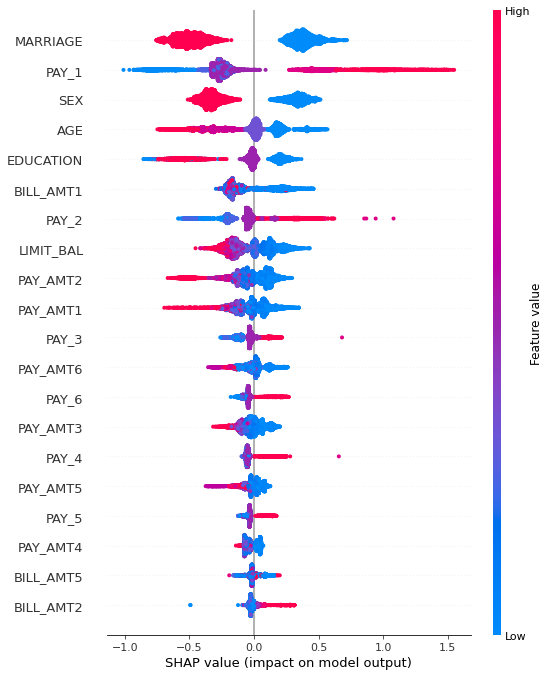

In [ ]:
# plotting summary plot
explainer = TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
summary_plot(shap_values,X_test)

**From the Shap Summary_Plot we can explain our complex model.**

* Red column shows the high features values 
* Blue column shows low feature values.
* On X axis there are shap values, positive will tell you about defaulter and negative values will tell customers will not default in next month.
* On y-axis, features are ordered in decreasing order in sense of importance for the XGBoost model to predict the default.

# **Model Explanation**

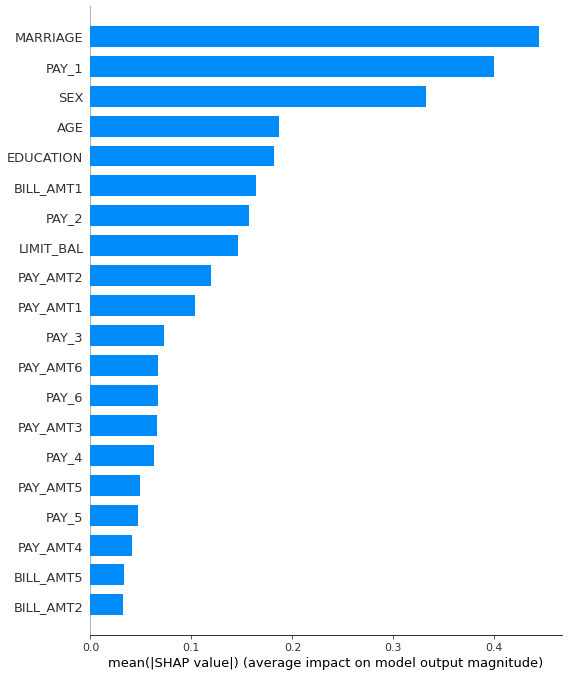

In [ ]:
# Shap summary_plot with bar
summary_plot(shap_values, X_train_smt, plot_type="bar")

# **Try to create model using another way(Model - 2)**

### **Create some featers**

In [ ]:
# Import the data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Abhishek Mishra ML classification capstone project/Copy of default of credit card clients.xls') 

In [ ]:
# Creating variable with the help of index 0
column_names = list(df.iloc[0].values)

# droping first row 
df.drop(index = df.index[0],axis = 0, inplace = True)

# Reset the columns
df = df.set_axis(column_names,axis = 1)

# Changing the data-types of each features
df = df.astype('int')

new_df=df

In [ ]:

df = new_df

In [ ]:
#renaming lavel column
df['IsDefaulter'] =df ['default payment next month']
df.drop('default payment next month',axis = 1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
# Renaming columns 
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

### **Using SMOTE(Synthetic Minority Oversampling Technique) because we have imbalenced data**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

# Print the actual data and resampled data
print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
# create the list of all column name
columns = list(df.columns)

In [ ]:
columns.pop()

'IsDefaulter'

In [ ]:
columns.pop()

'default payment next month'

In [ ]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [ ]:
balance_df['IsDefaulter'] = y_smote

### **Feature Engineering**

In [ ]:
# put the data in another varibel
df_fr = balance_df.copy()

In [ ]:
# add all the payment_value data 
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']

In [ ]:
df_fr.tail(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value
46726,26521,346963,1,1,1,39,-1,-1,0,-1,...,539,739,814,109,277,539,739,111,1,-5
46727,22235,180000,1,2,0,37,-2,-2,-2,-2,...,138,66,2356,919,104,138,66,89,1,-12


In [ ]:
# Create another column named Dues bill_amt - pay_amt
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [ ]:
df_fr.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,3913


In [ ]:
 # we can convert education 6 with 4 and 0 with 4
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 5, 4, df_fr['EDUCATION'])

In [ ]:
# convert marrige 0 as 3
df_fr['MARRIAGE']=np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

In [ ]:
# Replace the column values
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

### **One Hot Encoding**

In [ ]:
# use one hot encoding 
df_fr = pd.get_dummies(df_fr,columns=['EDUCATION','MARRIAGE'])

In [ ]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,IsDefaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,1,-2,3913,0,0,0,1,1,0,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,1,3,10352,0,0,0,1,0,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,0,76608,0,0,0,1,0,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,0,174713,0,0,0,1,1,0,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,0,-2,44620,0,0,0,1,1,0,0


In [ ]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [ ]:
# Drop id column from the dataset
df_fr.drop('ID',axis = 1, inplace = True)

In [ ]:
# Create a variabel 
df_log_reg = df_fr.copy()

In [ ]:
# Extract X and Y from the dataset
X = df_log_reg.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_log_reg['IsDefaulter']

In [ ]:
columns = X.columns

### **Use train test split**

In [ ]:
# Use standard scaler 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# use train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

### **1. Logistic Regression**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [ ]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=0.1)

In [ ]:
# Best parameters 
logistic_grid_model.best_params_ 

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
# Best score
logistic_grid_model.best_score_

0.7210502648470721

In [ ]:
# Predicted results
y_train_pred = logistic_grid_model.predict(X_train)
y_test_pred = logistic_grid_model.predict(X_test)

**Model Evaluation**

In [ ]:
# Importing important matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [ ]:
# Training and testing accuracy 
train_accuracy1 = accuracy_score(y_train_pred, y_train)
test_accuracy1 = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy1)
print('Testing accuracy:', test_accuracy1)

Training accuracy: 0.7216277509822084
Testing accuracy: 0.7205109915050905


Precision score of logistic model: 0.7165053489556801
 
Recall score of logistic model: 0.7297016861219195
 
F1 score of logistic model:  0.7230433106284538
 
ROC AUC score of logistic model:  0.7205115874520893
 
Confusion matrix of logistic model 
: [[5485 2226]
 [2084 5626]]
 


Text(0.5, 1.0, 'Confusion Matrix of Logistic Model')

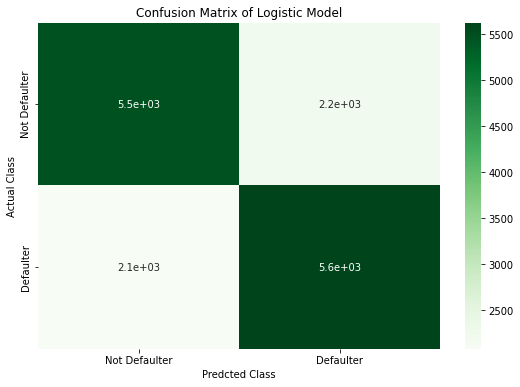

In [ ]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision, 
log_test_precision1 = precision_score(y_test,y_test_pred)

  # recall, 
log_test_recall1 = recall_score(y_test,y_test_pred,)

  # f1 score
log_f1_score1 = f1_score(y_test,y_test_pred)

  # roc_auc_score
log_roc_auc_score1 = roc_auc_score(y_test,y_test_pred)

  # confusion matrix
log_confusion_mat = confusion_matrix(y_test,y_test_pred)

  # Printing all these matrices
print('Precision score of logistic model:',log_test_precision1)
print(' ')
print('Recall score of logistic model:', log_test_recall1)
print(' ')
print('F1 score of logistic model: ', log_f1_score1)
print(' ')
print('ROC AUC score of logistic model: ',log_roc_auc_score1)
print(' ')
print('Confusion matrix of logistic model \n:',log_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(log_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Logistic Model',fontsize = 12)

### **2.RANDOM FOREST**

In [ ]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train)
y_test_rf_pred = rf_classifier.predict(X_test)

In [ ]:
# Training and testing accuracy
rf_training_accuracy1 = accuracy_score(y_train,y_train_rf_pred)
rf_testing_accuracy1 = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy1)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy1)

Training Accuracy of Random Forest: 0.9992972817580733
Testing Accuracy of Random Forest: 0.8343168406718112


Precision score of RANDOM FOREST model: 0.8484520751656077
 
Recall score of RANDOM FOREST model: 0.8140077821011673
 
F1 score of RANDOM FOREST model:  0.8308731051830278
 
ROC AUC score of RANDOM FOREST model:  0.8343155237830437
 
Confusion matrix of RANDOM FOREST 
: [[6590 1121]
 [1434 6276]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

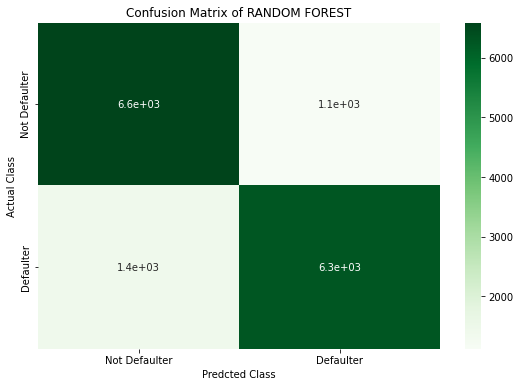

In [ ]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision, 
rf_test_precision1 = precision_score(y_test,y_test_rf_pred)

  # recall, 
rf_test_recall1 = recall_score(y_test,y_test_rf_pred,)

  # f1 score
rf_f1_score1 = f1_score(y_test,y_test_rf_pred)

  # roc_auc_score
rf_roc_auc_score1 = roc_auc_score(y_test,y_test_rf_pred)

  # confusion matrix
rf_confusion_mat = confusion_matrix(y_test,y_test_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST model:',rf_test_precision1)
print(' ')
print('Recall score of RANDOM FOREST model:', rf_test_recall1)
print(' ')
print('F1 score of RANDOM FOREST model: ', rf_f1_score1)
print(' ')
print('ROC AUC score of RANDOM FOREST model: ',rf_roc_auc_score1)
print(' ')
print('Confusion matrix of RANDOM FOREST \n:',rf_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

### **3.Decision Tree Classifier**

**Decision Tree Classifier with hyperparameter tuning**

In [ ]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
decision_tree_model = GridSearchCV(dtc, param_grid = {'max_depth': [2,4,6,8],
                                                      'min_samples_leaf': [2,4,6,8,10],
                                                      'min_samples_split':[2,4,6,8,10]},
                                   scoring = 'recall',cv = 3, n_jobs = -1)
decision_tree_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [ ]:
decision_tree_model.best_estimator_
decision_tree_model.best_params_
decision_tree_model.best_score_

0.7122780120097101

In [ ]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(X_train)
y_test_dtc_pred = decision_tree_model.predict(X_test)

# Getting the training and testing accuracy
dtc_training_accuracy1 = accuracy_score(y_train,y_train_dtc_pred)
dtc_testing_accuracy1 = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy1)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy1)

Training accuracy of decision tree classifier: 0.7709138531318874
Testing accuracy of decision tree classifier: 0.7531288502691136


Precision score of Decision Tree model: 0.7974394147233653
 
Recall score of Decision Tree model: 0.6785992217898833
 
F1 score of Decision Tree model:  0.7332352322892579
 
ROC AUC score of Decision Tree model:  0.7531240175866807
 
Confusion matrix of Decision Tree model 
: [[6382 1329]
 [2478 5232]]
 


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

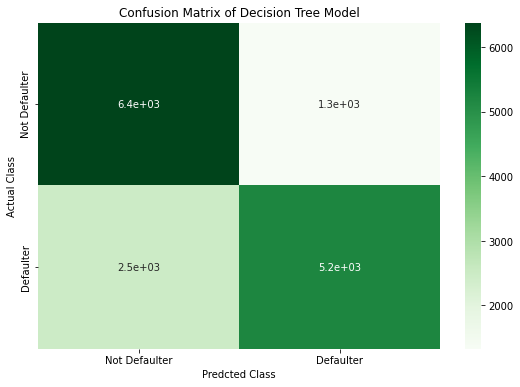

In [ ]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision, 
dt_test_precision1 = precision_score(y_test,y_test_dtc_pred)

  # recall, 
dt_test_recall1 = recall_score(y_test,y_test_dtc_pred,)

  # f1 score
dt_f1_score1 = f1_score(y_test,y_test_dtc_pred)

  # roc_auc_score
dt_roc_auc_score1 = roc_auc_score(y_test,y_test_dtc_pred)

  # confusion matrix
dt_confusion_mat = confusion_matrix(y_test,y_test_dtc_pred)

  # Printing all these matrices
print('Precision score of Decision Tree model:',dt_test_precision1)
print(' ')
print('Recall score of Decision Tree model:', dt_test_recall1)
print(' ')
print('F1 score of Decision Tree model: ', dt_f1_score1)
print(' ')
print('ROC AUC score of Decision Tree model: ',dt_roc_auc_score1)
print(' ')
print('Confusion matrix of Decision Tree model \n:',dt_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dt_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Decision Tree Model',fontsize = 12)

### **4.XGBoost**

In [ ]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train,y_train)

XGBClassifier(class_weight='balanced',
              parameters={'eta': 1, 'eval_metric': 'auc', 'max_depth': 7,
                          'silent': 1},
              random_state=42)

In [ ]:
# Train and test prediction
y_train_xgb_pred = xgb.predict(X_train)
y_test_xgb_pred = xgb.predict(X_test)
  

# gettig training and testing accuracy
xgb_training_accuracy1 = accuracy_score(y_train_xgb_pred,y_train)
xgb_testing_accuracy1 = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy1}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy1}')

Training Accuracy of XGBClassifier: 0.7909093812885297
Testing Accuracy of XGBClassifier: 0.7867194085986642


Precision score of XGBoost model: 0.808169524606162
 
Recall score of XGBoost model: 0.7518806744487678
 
F1 score of XGBoost model:  0.7790096082779009
 
ROC AUC score of XGBoost model:  0.7867171495703831
 
Confusion matrix of XGBoost model 
: [[6335 1376]
 [1913 5797]]
 


Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model')

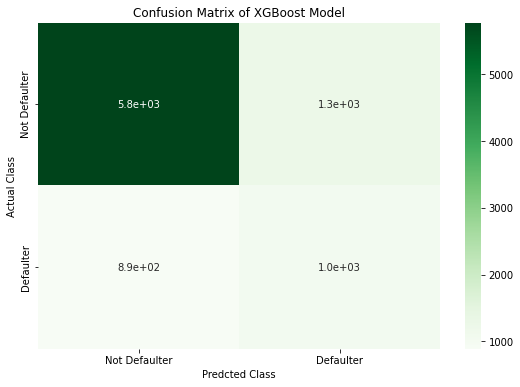

In [ ]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision, 
xg_test_precision1 = precision_score(y_test,y_test_xgb_pred)

  # recall, 
xg_test_recall1 = recall_score(y_test,y_test_xgb_pred,)

  # f1 score
xg_f1_score1 = f1_score(y_test,y_test_xgb_pred)

  # roc_auc_score
xg_roc_auc_score1 = roc_auc_score(y_test,y_test_xgb_pred)

  # confusion matrix
xg_confusion_mat1 = confusion_matrix(y_test,y_test_xgb_pred)

  # Printing all these matrices
print('Precision score of XGBoost model:',xg_test_precision1)
print(' ')
print('Recall score of XGBoost model:', xg_test_recall1)
print(' ')
print('F1 score of XGBoost model: ', xg_f1_score1)
print(' ')
print('ROC AUC score of XGBoost model: ',xg_roc_auc_score1)
print(' ')
print('Confusion matrix of XGBoost model \n:',xg_confusion_mat1)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xg_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBoost Model',fontsize = 12)

### **Plot ROC-AUC Curve**

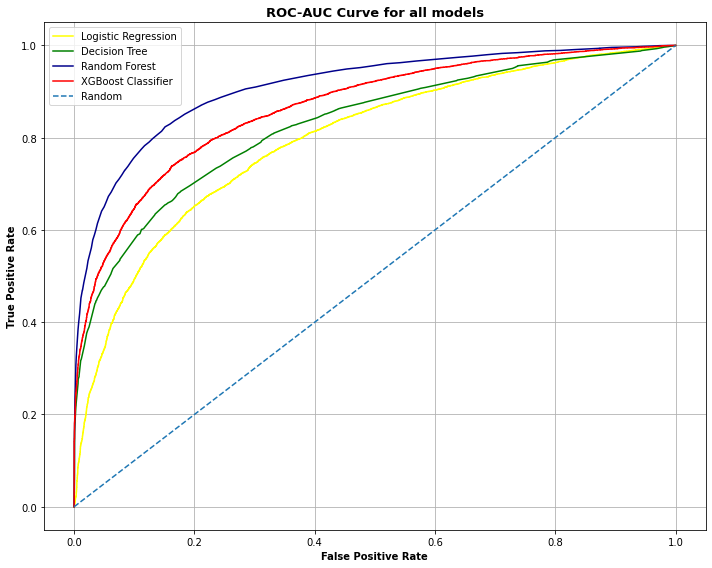

In [ ]:
from sklearn import metrics
# predicting probabilities for all model used
y_log_proba = logistic_grid_model.predict_proba(X_test)[::,1]
y_dtc_proba = decision_tree_model.predict_proba(X_test)[::,1]
y_rf_proba = rf_classifier.predict_proba(X_test)[::,1]
y_xgb_proba = xgb.predict_proba(X_test)[::,1]

# define metrics
fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_log_proba)
fpr_dtc, tpr_dtc, _ = metrics.roc_curve(y_test,  y_dtc_proba)
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_rf_proba)


fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_xgb_proba)

#
random_probs = [0 for _ in range(len(y_test))]
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)

# plotting ROC-AUC curve
plt.figure(figsize = (10,8))
plt.grid(True)

# plot the the ROC-AUC curve for the logistic Model
plt.plot(fpr_log, tpr_log, linestyle='-',color='yellow', label='Logistic Regression')

# plot the ROC-AUC curve for the decision tree model
plt.plot(fpr_dtc, tpr_dtc, linestyle='-',color='green', label='Decision Tree')

# plot the ROC-AUC curve for the RandomForest
plt.plot(fpr_rf, tpr_rf, linestyle='-',color='darkblue', label='Random Forest')



# plot the ROC-AUC curve for the xgb model
plt.plot(fpr_xgb, tpr_xgb, linestyle='-',color='red', label='XGBoost Classifier')

#plot the ROC-AUC curve for the random model 
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')


# Defining titles and co-ordinates labels
plt.title('ROC-AUC Curve for all models',fontweight = 'bold', fontsize = 13)
plt.xlabel('False Positive Rate',fontweight = 'bold')
plt.ylabel('True Positive Rate',fontweight = 'bold')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

### **EVALUATION MATRIX**

In [ ]:
# explaining evaluation matrix
Models = ['Logistic Regression','Random Forest','Decision Tree Classifier', 'XGBoost Classifier']
train_accuracy = [train_accuracy1, rf_training_accuracy1,dtc_training_accuracy1, xgb_training_accuracy1]
test_accuracy = [test_accuracy1, rf_testing_accuracy1,dtc_testing_accuracy1, xgb_testing_accuracy1]
precision_score = [log_test_precision1, rf_test_precision1,dt_test_precision1, xg_test_precision1]
recall_score = [log_test_recall1, rf_test_recall1,dt_test_recall1,xg_test_recall1]
f1_score = [log_f1_score1, rf_f1_score,dt_f1_score1, xg_f1_score1]
roc_auc_score = [log_roc_auc_score1, rf_roc_auc_score1,dt_roc_auc_score1, xg_roc_auc_score1]

data = {'Classification Models':Models,'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy,
        'Precision Score':precision_score,'Recall Score':recall_score,'F1 Score':f1_score,'ROC-AUC Score':roc_auc_score}

evaluation_matrix = pd.DataFrame(data)
evaluation_matrix

,Classification Models,Training Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Logistic Regression,0.721628,0.720511,0.716505,0.729702,0.723043,0.720512
1,Random Forest,0.999297,0.834317,0.848452,0.814008,0.471718,0.834316
2,Decision Tree Classifier,0.770914,0.753129,0.797439,0.678599,0.733235,0.753124
3,XGBoost Classifier,0.790909,0.786719,0.808170,0.751881,0.779010,0.786717


# **Conclusion:-**


### **Prepare for Modeling**

* we use **pairplots** for understanding the data.

* Also created **bins** for **AGE** columns.

* This dataset is also **imbalanced**, with **78%** non-default vs **22%** default.

* We use **SMOTE** because the class is highlly **Imbalance**


---




### **MODELS - 1**

* Using a **Logistic Regression** classifier, we can predict with **68.37%** accuracy, whether a customer is likely to default next month.

* Using **Decision Tree** classifier, we can predict with **73.83%** accuracy whether a customer is likely to default next month or not.

* Using **Random Fores**t, we can predict with **78.38%** accuracy whether a customer will be defaulter in next month or not.

* By applying **XGBoost Classifier** with recall **75%**, we can predict with 81.60% accuracy whether a customer is likely to default next month.


---
### **MODELS - 2**

* Rename default default payment next month to is defaulter
use smote because the data is imbalanced

* Create another feater named Payement_Value after adding all pay columns
* Create another feater Dues after adding all dues
* Replace 5,6,0 to 4 in education column
* Replace 0 with 3 in marrige column
* Using one hot encoding on Education, Marrige,column
* Using lavel encoding on  Sex column

* Using a **Logistic Regression** classifier, we can predict with **72%** accuracy, whether a customer is likely to default next month.

* Using **Decision Tree** classifier, we can predict with **83.83%** accuracy whether a customer is likely to default next month or not.

* Using **Random Fores**t, we can predict with **74.38%** accuracy whether a customer will be defaulter in next month or not.

* By applying **XGBoost Classifier** with recall **78%**, we can predict with 81.60% accuracy whether a customer is likely to default next month.


---


### **Model Explaination**

* 'MARRIGE' is the most important features and pay_1 and SEX are also important.

* pay_amt4 is the least important feature.

